<a href="https://colab.research.google.com/github/Nanashi-bot/autoencoder/blob/main/autoencodermnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations (e.g., convert to tensor)
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='mnist_data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='mnist_data', train=False, transform=transform, download=True)

# Create DataLoader for batching
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 39240582.65it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1121004.01it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9815525.12it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2618989.38it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



In [ ]:
# Example: Display the shape of the first batch
images, labels = next(iter(train_loader))
print(images.shape)  # (64, 1, 28, 28) -> 64 samples, 1 channel (grayscale), 28x28 size
print(labels.shape)  # (64,) -> 64 labels

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
labels[1]

tensor(3)

In [ ]:
images[1].shape

torch.Size([1, 28, 28])

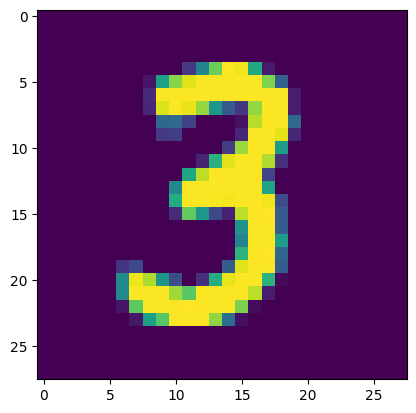

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[1].permute(1, 2, 0))

In [ ]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12)
            )
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, input):
        encoded = self.encoder(input)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 15

In [ ]:
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        encoded, reconstructed = model(img)
        loss = criterion(reconstructed, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/15], Loss: 0.0319
Epoch [2/15], Loss: 0.0235
Epoch [3/15], Loss: 0.0220
Epoch [4/15], Loss: 0.0216
Epoch [5/15], Loss: 0.0176
Epoch [6/15], Loss: 0.0197
Epoch [7/15], Loss: 0.0138
Epoch [8/15], Loss: 0.0171
Epoch [9/15], Loss: 0.0174
Epoch [10/15], Loss: 0.0146
Epoch [11/15], Loss: 0.0141
Epoch [12/15], Loss: 0.0151
Epoch [13/15], Loss: 0.0164
Epoch [14/15], Loss: 0.0168
Epoch [15/15], Loss: 0.0170


In [ ]:
def show_img(before, after):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(before.reshape(1,28,28).permute(1, 2, 0))
    axes[1].imshow(after.reshape(1,28,28).permute(1, 2, 0).detach().numpy())
    plt.show()

In [ ]:
test_img, _ = next(iter(train_loader))
test_img = test_img.view(test_img.size(0), -1)
encoded_vector, reconstructed_img = model(test_img)

In [ ]:
encoded_vector[0]

tensor([ 8.6189, -0.2114, -3.8182, -5.5779, -1.4426,  7.2515, -5.6039,  1.1166,
         3.6375,  5.9343,  2.5142, -8.5766], grad_fn=<SelectBackward0>)

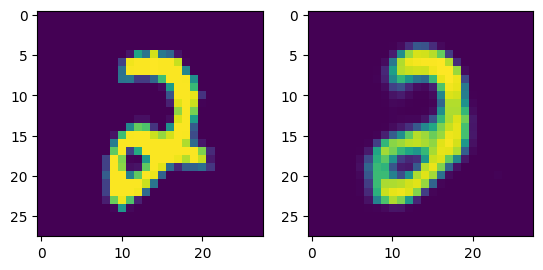

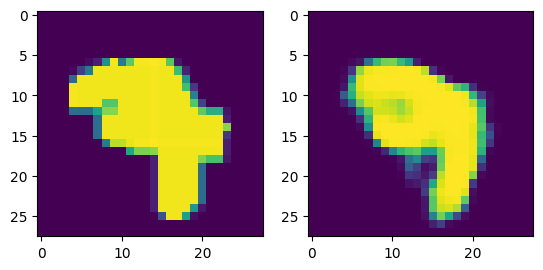

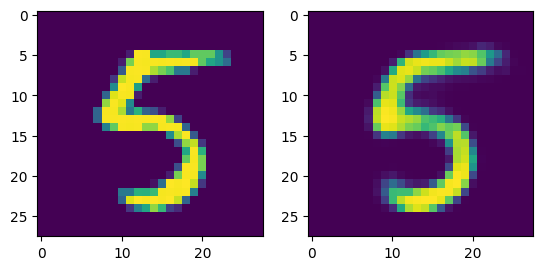

In [ ]:
for i in range(3):
    show_img(test_img[i], reconstructed_img[i])